# Research on Implementing Text PII Anonymization using NLP

We were provided with 4 option of data sets among which I considerd the Iranian Website log Dataset. 

This dataset consists of an excel sheet "client_hostname.csv" which we are going to explore and share our research findings on.

Considering the data samples provided in the context I found a few libraries to do the operation with.  

### Presidio from Microsoft, that can be used for PII Anonymization. 


Presido works like - 

![alt text](detection_flow.gif)

In [2]:
import pandas as pd

data  = pd.read_csv("archive/client_hostname.csv")

In [3]:
data.head()

,client,hostname,alias_list,address_list
0,5.123.144.95,5.123.144.95,[Errno 1] Unknown host,NaN
1,5.122.76.187,5.122.76.187,[Errno 1] Unknown host,NaN
2,5.215.249.99,5.215.249.99,[Errno 1] Unknown host,NaN
3,31.56.102.211,31-56-102-211.shatel.ir,['211.102.56.31.in-addr.arpa'],['31.56.102.211']
4,5.123.166.223,5.123.166.223,[Errno 1] Unknown host,NaN


In [1]:
from presidio_analyzer import AnalyzerEngine
from presidio_anonymizer import AnonymizerEngine

In [2]:
from presidio_analyzer import AnalyzerEngine
from presidio_anonymizer import AnonymizerEngine

text="My phone number is 212-555-5555"

# Set up the engine, loads the NLP module (spaCy model by default) 
# and other PII recognizers
analyzer = AnalyzerEngine()

# Call analyzer to get results
results = analyzer.analyze(text=text,
                           entities=["PHONE_NUMBER"],
                           language='en')
print(results)

# Analyzer results are passed to the AnonymizerEngine for anonymization

anonymizer = AnonymizerEngine()

anonymized_text = anonymizer.anonymize(text=text,analyzer_results=results)
print(f'{text}')
print(anonymized_text)

[type: PHONE_NUMBER, start: 19, end: 31, score: 0.75]
My phone number is 212-555-5555
text: My phone number is <PHONE_NUMBER>
items:
[
    {'start': 19, 'end': 33, 'entity_type': 'PHONE_NUMBER', 'text': '<PHONE_NUMBER>', 'operator': 'replace'}
]



In [5]:
data = data.head(10)
print(data)

   LineId        Date      Time Level Component  \
0       1  2016-09-28  04:30:30  Info       CBS   
1       2  2016-09-28  04:30:31  Info       CSI   
2       3  2016-09-28  04:30:31  Info       CSI   
3       4  2016-09-28  04:30:31  Info       CSI   
4       5  2016-09-28  04:30:31  Info       CBS   
5       6  2016-09-28  04:30:31  Info       CBS   
6       7  2016-09-28  04:30:31  Info       CBS   
7       8  2016-09-28  04:30:31  Info       CBS   
8       9  2016-09-28  04:30:31  Info       CBS   
9      10  2016-09-28  04:30:31  Info       CBS   

                                             Content EventId  \
0  Loaded Servicing Stack the number is 916362931...     E23   
1  00000001@2016/9/27:20:30:31.455 WcpInitialize ...     E13   
2  00000002@2016/9/27:20:30:31.458 WcpInitialize ...     E13   
3  00000003@2016/9/27:20:30:31.458 WcpInitialize ...     E13   
4            Ending TrustedInstaller initialization.     E17   
5           Starting the TrustedInstaller main loop.  

Implementing this on the dataset

In [7]:
import pandas as pd
from presidio_analyzer import AnalyzerEngine
from presidio_anonymizer import AnonymizerEngine

# Load the dataset
file_path = 'Windows_2k.log_structured.csv'
data = pd.read_csv(file_path)


# Initialize the engines
analyzer = AnalyzerEngine()
anonymizer = AnonymizerEngine()

# Function to anonymize PII in text
def anonymize_text(text):
    results = analyzer.analyze(text=text, entities=["PHONE_NUMBER"], language='en')
    anonymized_result = anonymizer.anonymize(text=text, analyzer_results=results)
    return anonymized_result.text

# Apply the anonymization in the 'Content' column
data['Anonymized Content'] = data['Content'].apply(anonymize_text)
print(data[['Content', 'Anonymized Content']])

# Optionally save the results
data.to_csv('Anonymized_data.csv', index=False)


                                                Content  \
0     Loaded Servicing Stack the number is 916362931...   
1     00000001@2016/9/27:20:30:31.455 WcpInitialize ...   
2     00000002@2016/9/27:20:30:31.458 WcpInitialize ...   
3     00000003@2016/9/27:20:30:31.458 WcpInitialize ...   
4               Ending TrustedInstaller initialization.   
...                                                 ...   
1995  Read out cached package applicability for pack...   
1996  Session: 30546354_3360174372 initialized by cl...   
1997  Read out cached package applicability for pack...   
1998  Session: 30546354_3363894584 initialized by cl...   
1999  Read out cached package applicability for pack...   

                                     Anonymized Content  
0     Loaded Servicing Stack the number is <PHONE_NU...  
1     00000001@2016/9/27:20:30:31.455 WcpInitialize ...  
2     00000002@2016/9/27:20:30:31.458 WcpInitialize ...  
3     00000003@2016/9/27:20:30:31.458 WcpInitialize ...  
4

Just to give a context, using MS Presido was  enough for a simple task --> 

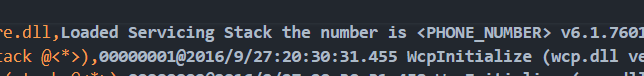

going through the first 10 rows, it has identified the phone number and masked it, on further changes to the code it will be able to mask several other params


# But Presido only works for a few params and there are other kinds of datasets in existence-> 


The previous dataset was the one from a windows machine from LogHub, this time we are going to use a differnet dataset, a Web sever logs kaggle dataset for an iranian e commerce website


We will try to apply presido here --> 

In [12]:
# Load the dataset (ensure the file path is correct)
file_path = 'archive\client_hostname.csv'
data = pd.read_csv(file_path)
data = data.head(20)


In [16]:
# Initialize the Presidio Analyzer engine
analyzer = AnalyzerEngine()

# Define a function to find PIIs in a text
def find_pii(text):
    try:
        # Presidio Analyzer processes the text
        analysis_results = analyzer.analyze(text=text, language='en')
        # Extracts the type of PII and the actual text identified as PII
        return [(result.entity_type, text[result.start:result.end]) for result in analysis_results]
    except Exception as e:
        # In case of any error during analysis, return an error message
        return [str(e)]

# List of columns to analyze for PII
columns_to_analyze = ['client', 'hostname', 'alias_list', 'address_list']  # Adjust the column names as needed

# Loop through each column and apply the PII finding function
for column in columns_to_analyze:
    if column in data.columns:
        data[f'PII Found in {column}'] = data[column].astype(str).apply(find_pii)
    else:
        print(f"Column '{column}' does not exist in the dataset.")

# Printing and reviewing the results
for column in columns_to_analyze:
    if column in data.columns:
        pii_data = data[data[f'PII Found in {column}'].apply(len) > 0]
        print(f"Results for {column}:")
        print(pii_data[[column, f'PII Found in {column}']])


Results for client:
             client                                PII Found in client
0      5.123.144.95                       [(IP_ADDRESS, 5.123.144.95)]
1      5.122.76.187                       [(IP_ADDRESS, 5.122.76.187)]
2      5.215.249.99                       [(IP_ADDRESS, 5.215.249.99)]
3     31.56.102.211  [(IP_ADDRESS, 31.56.102.211), (PHONE_NUMBER, 3...
4     5.123.166.223  [(IP_ADDRESS, 5.123.166.223), (PHONE_NUMBER, 5...
5       5.160.26.98                        [(IP_ADDRESS, 5.160.26.98)]
6     5.127.147.132  [(IP_ADDRESS, 5.127.147.132), (PHONE_NUMBER, 5...
7     158.58.30.218                      [(IP_ADDRESS, 158.58.30.218)]
8      86.55.230.86                       [(IP_ADDRESS, 86.55.230.86)]
9      89.35.65.186  [(PERSON, 89.35.65.186), (IP_ADDRESS, 89.35.65...
10    5.120.208.157  [(DATE_TIME, 5.120.208.157), (IP_ADDRESS, 5.12...
11     192.15.193.5                       [(IP_ADDRESS, 192.15.193.5)]
12     46.41.210.95                       [(IP_ADDRESS, 4

### And it successfully manages to take out all the PII detials from the dataset.

Presido has some issues with it's default spaCy model that can adjusted with falir or hugging face models, right now it can't detect the PERSON entity if the names are in diffrent cases (uppercase or lowercase)

In [17]:
from presidio_analyzer import AnalyzerEngine

# Initialize the Presidio Analyzer engine
analyzer = AnalyzerEngine()

# Test different case variations of the name
results_uppercase = analyzer.analyze(entities=["PERSON"], text='SOPHY SANTINO', language="en")
results_propercase = analyzer.analyze(entities=["PERSON"], text='Sophy Santino', language="en")
results_lowercase = analyzer.analyze(entities=["PERSON"], text='sophy santino', language="en")

# Print results to observe the behavior
print("Results for uppercase:", results_uppercase)
print("Results for proper case:", results_propercase)
print("Results for lowercase:", results_lowercase)


Results for uppercase: []
Results for proper case: [type: PERSON, start: 0, end: 13, score: 0.85]
Results for lowercase: []


1. Is it possible to anonymize the dataset using NLP?

Yes, it is possible, there are existing solutions to the problem and can be much better ones that can be developed

2. Does it ‘successfully’ anonymize?

Yes, it does anonymize to an extent, but data can be of various types and sizes, and hence the models NLP models needs to be more robust to understand data. 

3. How easy is it to use NLP?

It was very easy to use NLP and apply it to various datasets. With simple libraries like Presido, we can remove a majority of the PII from the Dataset, but not completely. We need more robust solutions for the same.

4. Does it make sense to use NLP?

Absolutely, it makes sense to use NLP and NER (ML) models to detect patterns in data and types of PII. 

5. Are the available libraries good enough?

As previously said, the availaible libraries are good enough but they can be more robust in terms of indentifying various PIIs in various types of Data, the main goal is indentification, libraries like Presido have no errors in masking.

### There are some encryption strategies that were not used in the library

one of them is polymorphic data encryption - 
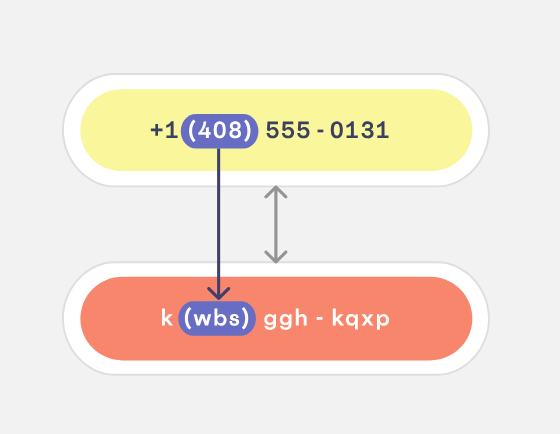